In [1]:
"""
This program generates series of random numbers from a gaussian distribution, then graphs them across 'time'.
'Time' is the number of random nums generated. 
Additionally, this program contains a function (multiple_gauss) which averages together these distributions
in accordance with pre-assigned weights.
"""

import ipywidgets
import matplotlib.pyplot as plt
import numpy as np
# import aux as aux

In [2]:
"""
Plot graphs with more readable xlims and ylims.
Parameters:
    time_x(list(ints)): The x values for the graph.
    gaussian_y(list(floats)): The y values for the graph.
"""
def lim_plots(time_x, gaussian_y):
    fig, ax = plt.subplots(figsize=(12, 6))
    x = time_x
    y = gaussian_y
    ax.plot(y)
    #the x axis should show 0 through time
    plt.xlim([0, len(time_x)-1])
    #the y axis shows twice the highest y value
    plt.ylim([0, max(gaussian_y) * 2])
    plt.xlabel("Time")
    plt.ylabel("Requests")
    plt.show()

In [3]:
"""
Parameters:
    mean(int): The mean of the distribution.
    sd(int): The standard deviation of the distribution.
    time(int): The number of points to generate.
    new_dist(list(lists)): The new distribution to follow. Should be in this form.
    [[end1,freq1], [end2,freq2]...] The first entry in the list should be the percentage of the graph this section of the distribution will go up to, and the second should be the probability that any random point generated with this distribution falls within that sections of the graph. For example, a distribution of [[0.5, 0.9], [1, 0.1]] will have 90% of points fall within the first half of the graph and 10% of points fall within the second half.  
Returns: 
    requests_y(list(floats)): a series of randomly generated numbers along said distribution.
"""
def unique_norm(middle, sd, time, custom_dist):
    #based off of the usual range of standard deviations: approximate, however.
    start = middle - sd * 4
    end = middle + sd * 4
    requests_y = []
    #for each point
    for i in range(time):
        rand_num = np.random.random()
        #the total number that rand_num must be below in order to fall into a certain probability block
        freq_sum = 0
        #for each of the distribution's blocks of probability
        for freq in range(len(custom_dist)):
            #ensures upper bound of probability is always increased
            #that way all points will eventually be added (because sum of all 
            freq_sum += custom_dist[freq][1]
            #if the random number is less than that sum
            if rand_num < freq_sum:
                #determine the range of the point's actual value
                upper_bound = start + ((abs(end)-start)*custom_dist[freq][0])
                #if this is the first probability block
                if freq == 0:
                    #then the range will be from 0 to the upper_bound
                    requests_y.append(np.random.uniform(start, upper_bound))
                    #exit this loop so it is not added again
                    break
                else:
                    requests_y.append(np.random.uniform(custom_dist[freq-1][0], upper_bound))
                    break
        #if we've reached the number of points requested
        if len(requests_y) == time:
            #leave loop
            break
    return requests_y

In [4]:
import mercury as mr
app = mr.App(title="Gaussian!", description="Slider demo", show_code=False)

mercury.App

In [5]:
time = mr.Slider(label="Time", value=24, min=0, max=100)

mercury.Slider

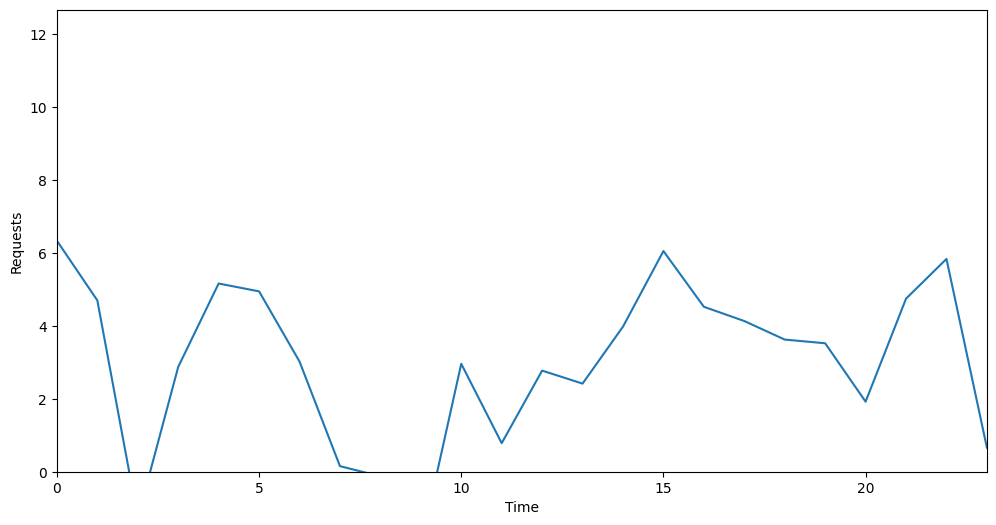

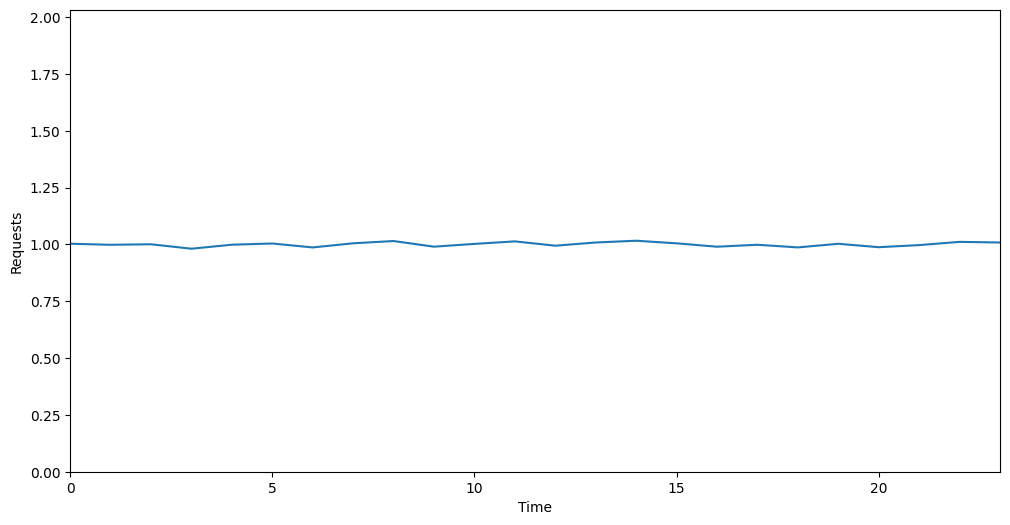

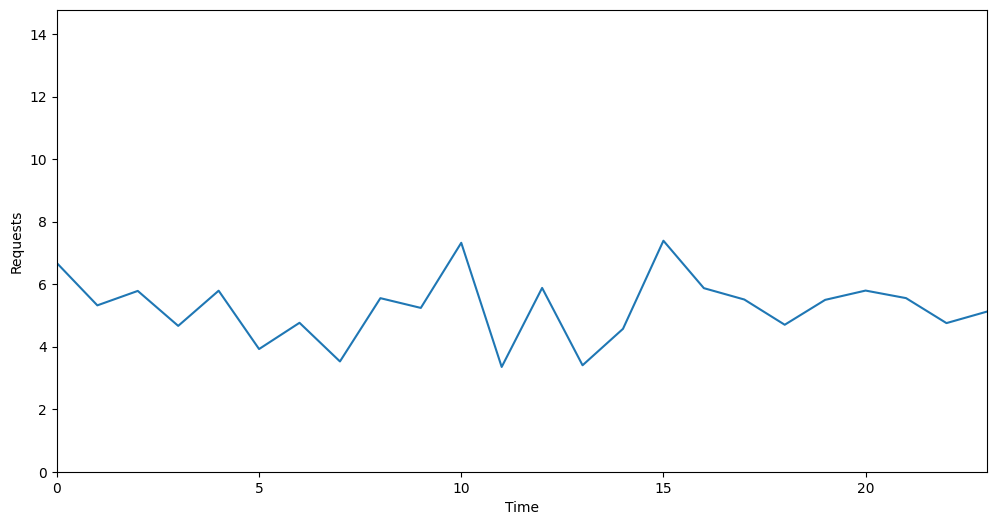

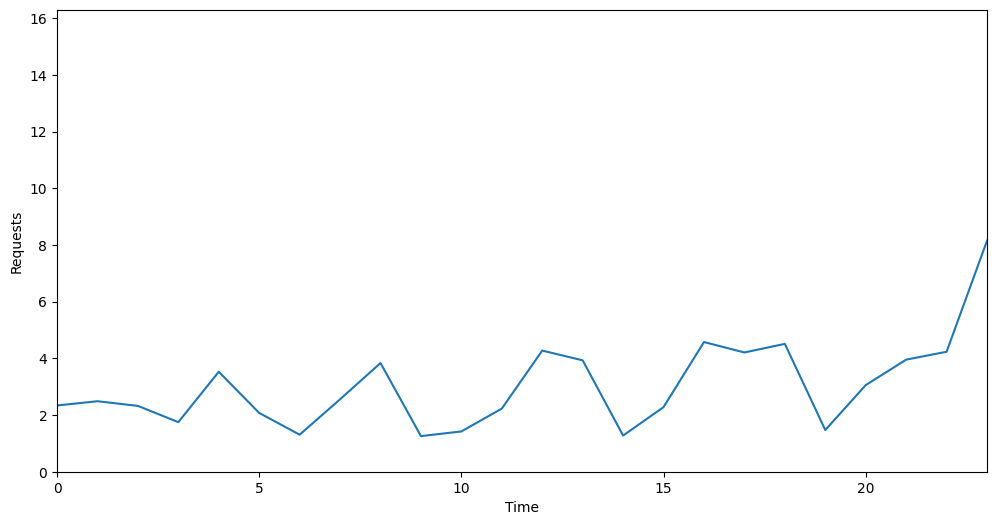

In [6]:
"""
Generate a series of random numbers based on a gaussian distribution. 
Parameters:
    gauss_mean(int): the mean of the distribution.
    gauss_sd(int): the standard deviation of the distribution.
    time(int): the amount of points to generate
    custom_dist(list(lists): A list of two-entry lists that describe a custom distribution. For further details, see the
    readme, or the unique_norm function in aux.py. Defaults to None, or a normal distribution.
    graph(boolean): Whether to show a graph of time vs. generated distribution, default True
Returns:
    gaussian_y(list(floats)): The generated distribution.
"""
def generate_random(gauss_mean, gauss_sd, time, custom_dist = None, graph=True): 
    time_x = [i for i in range(time)]
    if not custom_dist:
        #generate from normal distribution
        gaussian_y = list(np.random.normal(gauss_mean, gauss_sd, time))
    else: 
        gaussian_y = unique_norm(gauss_mean, gauss_sd, time, custom_dist)
    if graph: 
        #lim_plots controls the x and y axis range
        lim_plots(time_x, gaussian_y)
    return gaussian_y
    
g_y = generate_random(3, 2, time.value)
g_y2 = generate_random(1, 0.01, time.value)
g_y3 = generate_random(5, 1, time.value)
g_custom = generate_random(5, 1, time.value, [[0.5, 0.9],[1, 0.1]])


In [7]:
#expects a list of lists of the same size, and a weights list that controls how much influence each should have
#weights should have as many entries as dists has lists
"""
Averages distributions together. 
Parameters: 
    dists(list(lists)): a list of lists, all the same size. Each list is expected to be numbers drawn from a distribution.
    weights(list(floats)): a list of numbers the same size as dists. Controls the influence each list in dists has on all_dists.
Returns all_dists:
    all_dists(list(floats)): an average of all the distributions in dists, weighted. 
"""
def multiple_gauss(dists, weights = None):
    if weights == None:
        weights = [1 for i in dists]
    #'time' represent the length of each dists list
    all_dists = []
    #dists[0] is arbitrary since all lists should be same size
    for time in range(len(dists[0])):
        pre_weights = [i[time] for i in dists]
        #for each value in pre_weights, i.e in the value at time for each dist, multiply by corresponding weight
        weighted = [pre_weights[i] * weights[i] for i in range(len(pre_weights))]
        dist_sum = sum(weighted)
        all_dists.append(dist_sum/len(dists))
    return all_dists   
      
all_dists = multiple_gauss([g_y, g_y2, g_y3], [0.8, 2, 1])

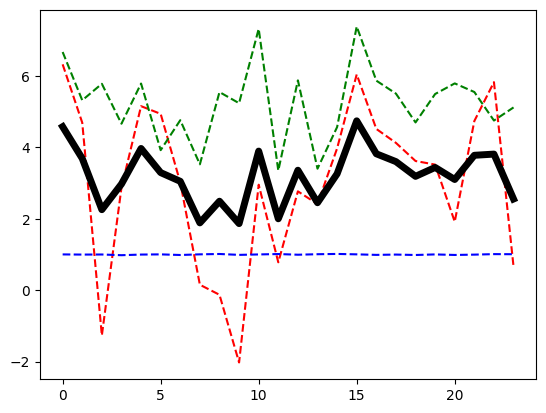

In [8]:
time_x = [i for i in range(24)]
plt.plot(time_x, g_y, color = 'red', linestyle = '--')
plt.plot(time_x, g_y2, color = 'blue', linestyle = '--')
plt.plot(time_x, g_y3, color = 'green', linestyle = '--')
plt.plot(time_x, all_dists, color = 'black', linewidth = '5')

(array([158., 164., 183., 196., 205.,   6.,  21.,  23.,  23.,  21.]),
 array([-3.99920552, -3.2008225 , -2.40243948, -1.60405646, -0.80567344,
        -0.00729042,  0.79109261,  1.58947563,  2.38785865,  3.18624167,
         3.98462469]),
 <BarContainer object of 10 artists>)

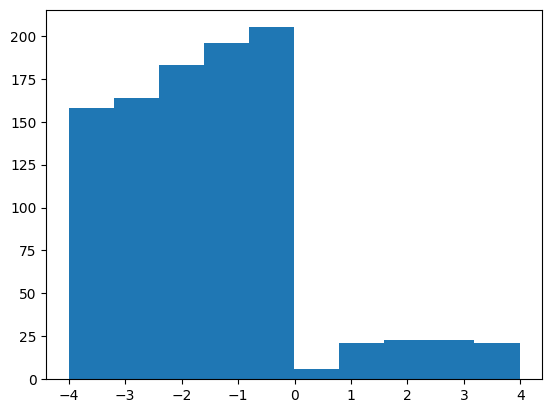

In [9]:
#this code is intended for visualizing custom distribution and ensuring you've created a valid entry.
test = unique_norm(0,1,1000, [[0.5, 0.9],[1, 0.1]])
plt.hist(test)